In [145]:
print "Mankatha da"

Mankatha da


In [123]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import h5py
import matplotlib.pyplot as plt

In [109]:
def myFunction(df):
    job_ids = df['job_id'].unique()
    df = df.drop(df.columns[[1,4,6,7,8,12]], axis=1)
    df=df.sort_values(['timestamp'])
    df = df[df.timestamp != 0]
    output_df = pd.DataFrame(columns=["job_id","task_index","waiting_time","resource_usage"])
    i = 1
    for job_id in job_ids:
        i=i+1
        small_df = df[df['job_id'] == job_id]
        if not small_df.empty:
    #         print "smalldf",small_df
            task_indexes = small_df['task_index'].unique()
    #         print "task_indexes",task_indexes
            for task_index in task_indexes:
                smallest_df1 = small_df[small_df['task_index'] == task_index]
                smallest_df1 = smallest_df1[smallest_df1['event_type'] == 0]
    #             print "smdf1",smallest_df1.iloc[0]
                smallest_df2 = small_df[small_df['task_index'] == task_index] 
                smallest_df2 = smallest_df2[smallest_df2['event_type'] == 1]
    #             print "smdf2",smallest_df2.iloc[0]
                if not ( smallest_df1.empty or smallest_df2.empty ):
                    row0 = smallest_df1.iloc[0]
                    row1 = smallest_df2.iloc[0]
    #                 print row0
    #                 print row1
                    resource_usage = (row0.cpu_req + row0.ram_req + row0.space_req)/3
                    job_idd = row0.job_id
                    task_indexx = row0.task_index
                    waiting_time = row1.timestamp - row0.timestamp
                    if not waiting_time < 0:
                        output_data = pd.DataFrame(columns=["job_id","task_index","waiting_time","resource_usage"],data=[[job_idd,task_indexx,waiting_time,resource_usage]])
        #                 print output_data
                        output_df = output_df.append(output_data)
                    break

    #         print small_df
    #     if i == 1000:
    #         break
    return output_df

In [117]:
data_dir = "./data/task_events/"
output_data_dir = './data/task_events_input/part-00000-of-00500.csv.gz'

task_events_header = ['timestamp','missing_info', 'job_id','task_index','machine_id','event_type',
                      'user_name','sched_class','priority','cpu_req','ram_req','space_req','diff_machine']

In [118]:
output_dataframe = pd.DataFrame()
for i in range(500):
    file_str = str(i).zfill(5) 
#     print file_str
    df = pd.read_csv(data_dir+"part-"+file_str+"-of-00500.csv.gz",header=None)
    df.columns = task_events_header
    out_df = myFunction(df)
    output_dataframe = output_dataframe.append(out_df)
    output_data_dir = "./data/task_events_input/part-"+file_str+"-of-00500.csv"
    out_df.to_csv(output_data_dir, sep='\t')

grouped_data = output_dataframe.groupby(['job_id']).mean()
grouped_data = grouped_data[grouped_data['waiting_time']>1000000000]

In [ ]:
print output_dataframe

In [139]:
grouped_data = output_dataframe.groupby(['job_id']).mean()

In [121]:
output_dataframe['waiting_time'].corr(output_dataframe['resource_usage'])

0.12628895482543345

In [ ]:
# plt.plot([x for x in range(len(mean_id_list))],mean_id_list)
plt.scatter(output_dataframe['waiting_time'].tolist(),output_dataframe['resource_usage'].tolist())
plt.show()

In [ ]:
grouped_data = grouped_data[grouped_data['resource_usage'] != 0]
grouped_data.dropna(axis=0,inplace=True)

In [ ]:
q1 = grouped_data['resource_usage'].quantile(0.25)
q3 = grouped_data['resource_usage'].quantile(0.75)
iqr = q3-q1
grouped_data = grouped_data[(grouped_data['resource_usage'] > (q1-1.5*iqr) ) & (grouped_data['resource_usage'] < (q3+1.5*iqr))]





In [143]:
q1 = grouped_data['waiting_time'].quantile(0.25)
q3 = grouped_data['waiting_time'].quantile(0.75)
iqr = q3-q1
grouped_data = grouped_data[(grouped_data['waiting_time'] > (q1-1.5*iqr) ) & (grouped_data['waiting_time'] < (q3+1.5*iqr))]

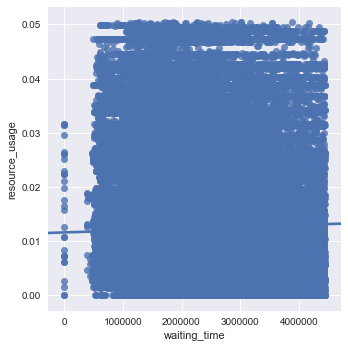

In [144]:
# library & dataset
import seaborn as sns
# df = sns.load_dataset('iris')
 
# use the function regplot to make a scatterplot
# sns.regplot(x=df["sepal_length"], y=df["sepal_width"])
#sns.plt.show()
 
# Without regression fit:

# sns.regplot(x=grouped_data['waiting_time'], y=grouped_data['resource_usage'], fit_reg=False)
# sns.plt.show()


sns.lmplot('waiting_time', 'resource_usage', data=grouped_data, fit_reg=True)
plt.show()